# For Mixture of Gases


In [1]:
import pandas as pd

# Specify the path to the Excel file
file_path = r'C:\Users\keval\OneDrive\Desktop\Assignments\Research Project_2\New Data\DATALOG with Cleaning_NEW v0.01pd.xlsx'

# List of sheet names to include in combined_df_2
sheets_to_include = [
    'Ethanol 200ppm', 'Ethanol 123ppm', 'Ethanol 161ppm', 
    'Methanol 292ppm', 'Methanol 137ppm', 'Methanol 164ppm', 
    'Isopropanol 217ppm ', 'Isopropanol 117ppm', 'Isopropanol 143ppm', 
    'E200 & M292', 'E123 & M137', 'E161 & M164', 
    'E200 & I217', 'E123 & I117', 'E161 & I143', 
    'M292 & I217', 'M137 & I117', 'M164 & I143'
]

# Read sheets to include into a list of DataFrames, skipping the first two rows
dfs_to_include = []

for sheet_name in sheets_to_include:
    # Read each sheet into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=2)
    
    # Add a new column 'Gas_Type' with the name of the current sheet
    df['Gas_Type'] = sheet_name
    
    # Append the modified DataFrame to the list
    dfs_to_include.append(df)

# Concatenate the DataFrames into a single DataFrame
combined_df_2 = pd.concat(dfs_to_include, ignore_index=True)

# Now you have all data from the specified sheets combined into a single DataFrame 'combined_df_2', 
# with a new column 'Gas_Type' indicating the gas type for each row
print(combined_df_2.head())


      ms  Ammonia (NH3)-Echem  Nitrogen Dioxide (NO2)  Ethylene  \
0   3779                 8374                    8292      8306   
1   9196                 8356                    8296      8308   
2  14596                 8352                    8303      8318   
3  19995                 8351                    8260      8287   
4  25400                 8349                    8270      8298   

   Carbon Monoxide (CO)  Alcohol- Acetone  Alcohol  Ammonia (NH3)- Ethanol  \
0                  8277             11802    21402                   40662   
1                  8342             11911    22432                   40989   
2                  8279             11936    22725                   40314   
3                  8304             11871    22676                   39124   
4                  8287             12021    22710                   38280   

   Blank  LDR (light sensor)  Moisture  Nitric Oxide (NO)  \
0  53384               64868     65128              49092   
1  531

In [2]:
combined_df_2.shape

(2565, 19)

# Plot relation between ms and VOCs

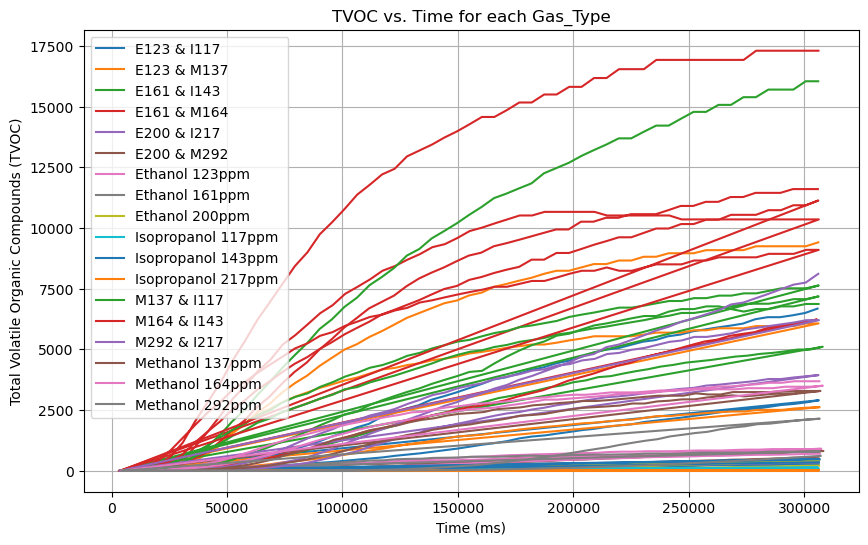

In [3]:
import matplotlib.pyplot as plt

# Assuming 'combined_df_2' is your DataFrame containing the required data

# Group the DataFrame by 'Gas_Type'
grouped_df = combined_df_2.groupby('Gas_Type')

# Plot a separate line plot for each Gas_Type
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for name, group in grouped_df:
    plt.plot(group['ms'], group['Total Volatile Organic Compounds (TVOC) (ppb)'], label=name)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Total Volatile Organic Compounds (TVOC)')
plt.title('TVOC vs. Time for each Gas_Type')
plt.legend()  # Add legend to show Gas_Type

# Show plot
plt.grid(True)
plt.show()


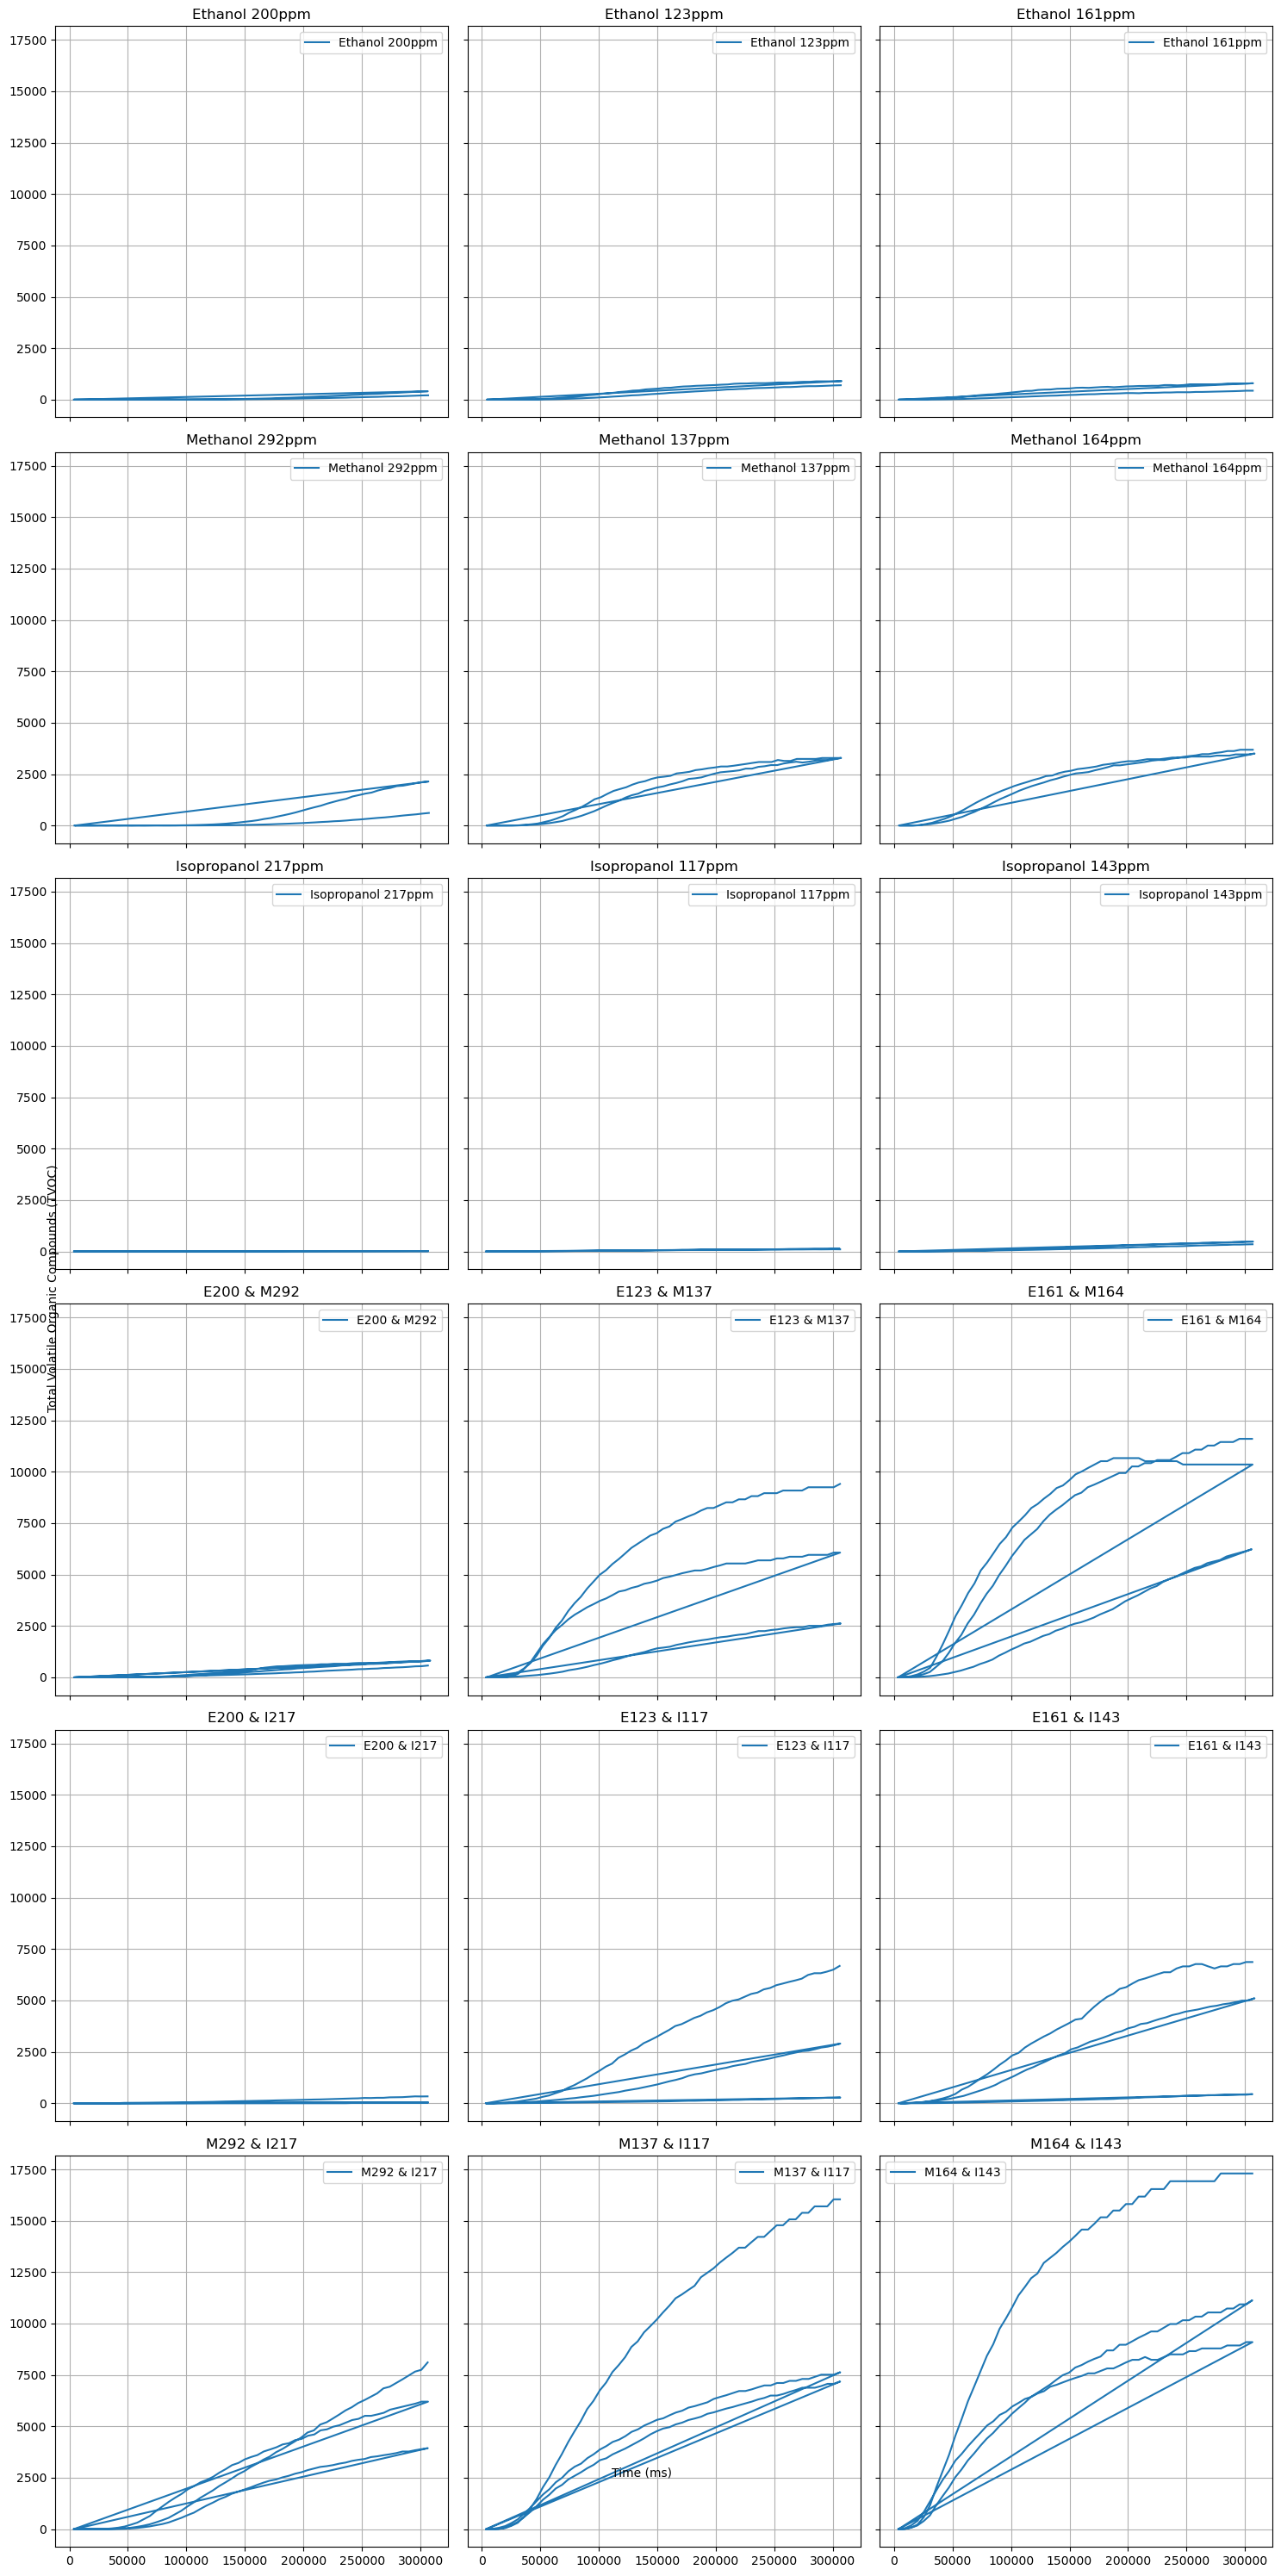

In [4]:
import matplotlib.pyplot as plt

# Assuming 'combined_df_2' is your DataFrame containing the required data

# Get unique Gas_Types
gas_types = combined_df_2['Gas_Type'].unique()

# Determine the layout of subplots
num_cols = 3  # Number of columns in the grid
num_rows = (len(gas_types) + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows), sharex=True, sharey=True)

# Plot for each Gas_Type
for i, gas_type in enumerate(gas_types):
    row = i // num_cols
    col = i % num_cols
    gas_data = combined_df_2[combined_df_2['Gas_Type'] == gas_type]
    ax = axes[row, col]
    ax.plot(gas_data['ms'], gas_data['Total Volatile Organic Compounds (TVOC) (ppb)'], label=gas_type)
    ax.set_title(f'{gas_type}')
    ax.legend()
    ax.grid(True)

# Add common x-axis label
fig.text(0.5, 0.04, 'Time (ms)', ha='center')
# Add common y-axis label
fig.text(0.04, 0.5, 'Total Volatile Organic Compounds (TVOC)', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [5]:
for sheet_name in sheets_to_include:
    # Read each sheet into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=2)
    
    # Print the shape of the DataFrame
    print(f'Sheet: {sheet_name}, Shape: {df.shape}')

Sheet: Ethanol 200ppm, Shape: (114, 18)
Sheet: Ethanol 123ppm, Shape: (114, 18)
Sheet: Ethanol 161ppm, Shape: (114, 18)
Sheet: Methanol 292ppm, Shape: (114, 18)
Sheet: Methanol 137ppm, Shape: (114, 18)
Sheet: Methanol 164ppm, Shape: (114, 18)
Sheet: Isopropanol 217ppm , Shape: (114, 18)
Sheet: Isopropanol 117ppm, Shape: (114, 18)
Sheet: Isopropanol 143ppm, Shape: (114, 18)
Sheet: E200 & M292, Shape: (171, 18)
Sheet: E123 & M137, Shape: (171, 18)
Sheet: E161 & M164, Shape: (171, 18)
Sheet: E200 & I217, Shape: (171, 18)
Sheet: E123 & I117, Shape: (171, 18)
Sheet: E161 & I143, Shape: (171, 18)
Sheet: M292 & I217, Shape: (171, 18)
Sheet: M137 & I117, Shape: (171, 18)
Sheet: M164 & I143, Shape: (171, 18)


In [6]:
combined_df_2.columns

Index(['ms', 'Ammonia (NH3)-Echem', 'Nitrogen Dioxide (NO2)', 'Ethylene',
       'Carbon Monoxide (CO)', 'Alcohol- Acetone', 'Alcohol',
       'Ammonia (NH3)- Ethanol', 'Blank', 'LDR (light sensor)', 'Moisture',
       'Nitric Oxide (NO)', 'Carbon Dioxide (CO2) (ppm)',
       'Total Volatile Organic Compounds (TVOC) (ppb)', 'Oxygen (O2) (%)',
       'Humidity (%)', 'Temp (deg C)', 'hic (look into)', 'Gas_Type'],
      dtype='object')

In [43]:
combined_df_2['Gas_Type'].unique()

array(['Ethanol 200ppm', 'Ethanol 123ppm', 'Ethanol 161ppm',
       'Methanol 292ppm', 'Methanol 137ppm', 'Methanol 164ppm',
       'Isopropanol 217ppm ', 'Isopropanol 117ppm', 'Isopropanol 143ppm',
       'E200 & M292', 'E123 & M137', 'E161 & M164', 'E200 & I217',
       'E123 & I117', 'E161 & I143', 'M292 & I217', 'M137 & I117',
       'M164 & I143'], dtype=object)

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter


# Separate features (X) and target variable (y)
X = combined_df_2.drop(columns=['Gas_Type'])
y = combined_df_2['Gas_Type']

# Display class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y))


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the count of each class in the target variable
class_counts = y_train.value_counts()

# Calculate the target number of samples for each class (3 times the majority class)
target_samples = {cls: class_counts.max() * 3 for cls, count in class_counts.items()}

# Apply SMOTE to the training set with specified sampling strategy
smote = SMOTE(sampling_strategy=target_samples, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Combine resampled features and target variable into a new DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Gas_Type'])], axis=1)

# Display class distribution after applying SMOTE
print("Class distribution after SMOTE:", y_resampled.value_counts())


Class distribution before SMOTE: Counter({'E200 & M292': 171, 'E123 & M137': 171, 'E161 & M164': 171, 'E200 & I217': 171, 'E123 & I117': 171, 'E161 & I143': 171, 'M292 & I217': 171, 'M137 & I117': 171, 'M164 & I143': 171, 'Ethanol 200ppm': 114, 'Ethanol 123ppm': 114, 'Ethanol 161ppm': 114, 'Methanol 292ppm': 114, 'Methanol 137ppm': 114, 'Methanol 164ppm': 114, 'Isopropanol 217ppm ': 114, 'Isopropanol 117ppm': 114, 'Isopropanol 143ppm': 114})
Class distribution after SMOTE: E200 & M292            423
E123 & M137            423
Methanol 137ppm        423
Isopropanol 117ppm     423
Ethanol 123ppm         423
M292 & I217            423
Isopropanol 143ppm     423
E161 & M164            423
E200 & I217            423
Methanol 292ppm        423
Methanol 164ppm        423
Ethanol 161ppm         423
Isopropanol 217ppm     423
M164 & I143            423
M137 & I117            423
E123 & I117            423
E161 & I143            423
Ethanol 200ppm         423
Name: Gas_Type, dtype: int64


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the GBM model with specified hyperparameters
gbm = GradientBoostingClassifier(n_estimators=50, 
                                 min_samples_split=450, 
                                 min_samples_leaf=7, 
                                 max_depth=5, 
                                 min_impurity_decrease=0.0, 
                                 max_leaf_nodes=30, 
                                 random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize GBM with the best hyperparameters
best_gbm = GradientBoostingClassifier(n_estimators=50, 
                                      min_samples_split=450, 
                                      min_samples_leaf=7, 
                                      max_depth=5, 
                                      min_impurity_decrease=0.0, 
                                      max_leaf_nodes=30, 
                                      learning_rate=best_params['learning_rate'],
                                      subsample=best_params['subsample'],
                                      max_features=best_params['max_features'],
                                      random_state=42)

# Train the model on the entire resampled training set
best_gbm.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = best_gbm.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'max_features': None, 'subsample': 0.9}
Accuracy: 0.98635477582846


In [9]:
best_gbm

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_leaf_nodes=30,
                           min_samples_leaf=7, min_samples_split=450,
                           n_estimators=50, random_state=42, subsample=0.9)

In [10]:
# Assuming 'best_gbm' is your trained GBM model

# Access feature importances
feature_importances = best_gbm.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the sorted feature importances
print(feature_importance_df)


                                          Feature  Importance
11                              Nitric Oxide (NO)    0.208353
7                          Ammonia (NH3)- Ethanol    0.130739
15                                   Humidity (%)    0.092022
5                                Alcohol- Acetone    0.086863
6                                         Alcohol    0.076187
2                          Nitrogen Dioxide (NO2)    0.072769
14                                Oxygen (O2) (%)    0.062748
1                             Ammonia (NH3)-Echem    0.047674
16                                   Temp (deg C)    0.044789
10                                       Moisture    0.042611
13  Total Volatile Organic Compounds (TVOC) (ppb)    0.034084
12                     Carbon Dioxide (CO2) (ppm)    0.033868
0                                              ms    0.022051
8                                           Blank    0.017606
4                            Carbon Monoxide (CO)    0.015102
17      

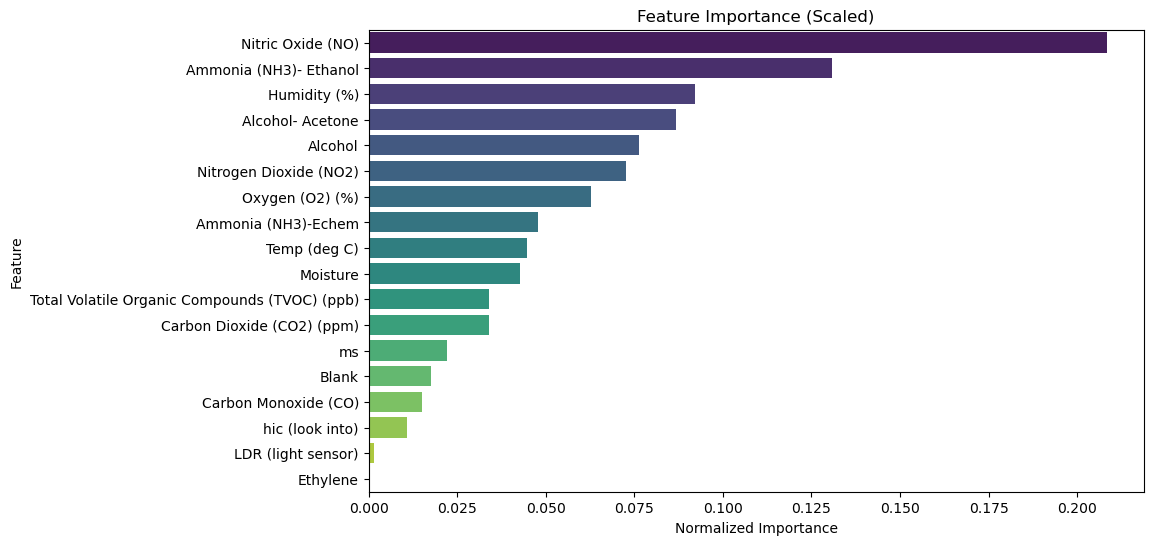

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize feature importances
normalized_importances = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()

# Create a new DataFrame with normalized importances
normalized_importance_df = pd.DataFrame({'Feature': feature_importance_df['Feature'], 'Normalized Importance': normalized_importances})

# Sort the DataFrame by normalized importance values in descending order
normalized_importance_df = normalized_importance_df.sort_values(by='Normalized Importance', ascending=False)

# Plot the scaled importance graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized Importance', y='Feature', data=normalized_importance_df, palette='viridis')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Scaled)')
plt.show()


C:\Users\keval\AppData\Local\Temp\ipykernel_1928\1722784423.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(class_labels, rotation=45, ha='right')


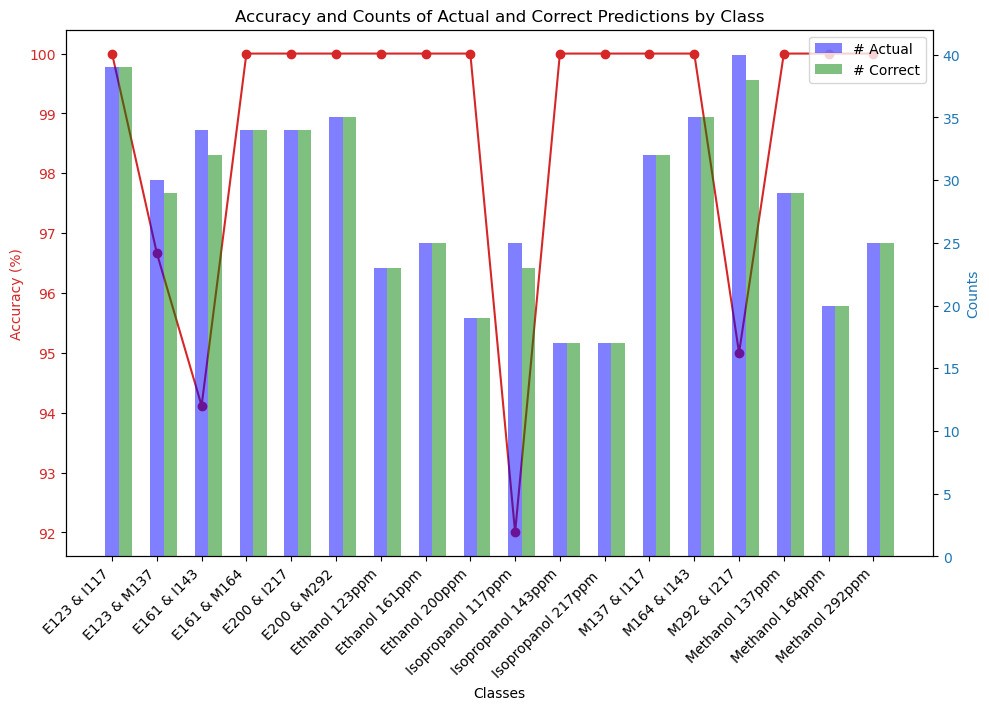

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
# Calculate accuracy for each class
class_labels = np.unique(y_test)
class_accuracy = []
for label in class_labels:
    class_mask = y_test == label
    class_correct = np.sum(y_test[class_mask] == y_pred[class_mask])
    class_total = np.sum(class_mask)
    class_accuracy.append(class_correct / class_total * 100)

# Calculate counts of actual instances for each class
class_counts_actual = []
for label in class_labels:
    class_counts_actual.append(np.sum(y_test == label))

# Calculate counts of correctly predicted instances for each class
class_counts_correct = []
for label in class_labels:
    class_mask = (y_test == label) & (y_test == y_pred)
    class_counts_correct.append(np.sum(class_mask))

# Plotting the combined graph for accuracy and counts
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Classes')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.plot(class_labels, class_accuracy, marker='o', color=color, label='% Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Counts', color=color)  
ax2.bar(np.arange(len(class_labels)), class_counts_actual, color='b', alpha=0.5, width=0.3, label='# Actual')
ax2.bar(np.arange(len(class_labels)) + 0.3, class_counts_correct, color='g', alpha=0.5, width=0.3, label='# Correct')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Accuracy and Counts of Actual and Correct Predictions by Class')

# Slant the x-axis labels
plt.xticks(rotation=45)
ax1.set_xticklabels(class_labels, rotation=45, ha='right')

plt.legend()
plt.show()


# Feature Importance Approach (Trying to keep all 7 sensors)

In [12]:
# Specify the columns to filter
columns_to_keep = ['ms','Nitric Oxide (NO)','Total Volatile Organic Compounds (TVOC) (ppb)','Ammonia (NH3)-Echem', 'Nitrogen Dioxide (NO2)', 'Ethylene', 'Carbon Monoxide (CO)', 'Alcohol- Acetone', 'Alcohol', 'Ammonia (NH3)- Ethanol','Humidity (%)','Oxygen (O2) (%)','Gas_Type']

# Filter the DataFrame to keep only the specified columns
filtered_df_3 = combined_df_2.filter(columns_to_keep)

# Now you have a DataFrame 'filtered_df' containing only the specified columns
print(filtered_df_3.head())


      ms  Nitric Oxide (NO)  Total Volatile Organic Compounds (TVOC) (ppb)  \
0   3779              49092                                              0   
1   9196              49138                                              0   
2  14596              49131                                              0   
3  19995              49134                                              0   
4  25400              49076                                              0   

   Ammonia (NH3)-Echem  Nitrogen Dioxide (NO2)  Ethylene  \
0                 8374                    8292      8306   
1                 8356                    8296      8308   
2                 8352                    8303      8318   
3                 8351                    8260      8287   
4                 8349                    8270      8298   

   Carbon Monoxide (CO)  Alcohol- Acetone  Alcohol  Ammonia (NH3)- Ethanol  \
0                  8277             11802    21402                   40662   
1             

In [13]:
filtered_df_3.columns

Index(['ms', 'Nitric Oxide (NO)',
       'Total Volatile Organic Compounds (TVOC) (ppb)', 'Ammonia (NH3)-Echem',
       'Nitrogen Dioxide (NO2)', 'Ethylene', 'Carbon Monoxide (CO)',
       'Alcohol- Acetone', 'Alcohol', 'Ammonia (NH3)- Ethanol', 'Humidity (%)',
       'Oxygen (O2) (%)', 'Gas_Type'],
      dtype='object')

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter


# Separate features (X) and target variable (y)
X_1 = filtered_df_3.drop(columns=['Gas_Type'])
y_1 = filtered_df_3['Gas_Type']

# Display class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_1))


# Split the dataset into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Get the count of each class in the target variable
class_counts = y_train_1.value_counts()

# Calculate the target number of samples for each class (3 times the majority class)
target_samples = {cls: class_counts.max() * 3 for cls, count in class_counts.items()}

# Apply SMOTE to the training set with specified sampling strategy
smote = SMOTE(sampling_strategy=target_samples, random_state=42)
X_resampled_1, y_resampled_1 = smote.fit_resample(X_train_1, y_train_1)

# Combine resampled features and target variable into a new DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled_1, columns=X_1.columns), pd.DataFrame(y_resampled_1, columns=['Gas_Type'])], axis=1)

# Display class distribution after applying SMOTE
print("Class distribution after SMOTE:", y_resampled_1.value_counts())


Class distribution before SMOTE: Counter({'E200 & M292': 171, 'E123 & M137': 171, 'E161 & M164': 171, 'E200 & I217': 171, 'E123 & I117': 171, 'E161 & I143': 171, 'M292 & I217': 171, 'M137 & I117': 171, 'M164 & I143': 171, 'Ethanol 200ppm': 114, 'Ethanol 123ppm': 114, 'Ethanol 161ppm': 114, 'Methanol 292ppm': 114, 'Methanol 137ppm': 114, 'Methanol 164ppm': 114, 'Isopropanol 217ppm ': 114, 'Isopropanol 117ppm': 114, 'Isopropanol 143ppm': 114})
Class distribution after SMOTE: E200 & M292            423
E123 & M137            423
Methanol 137ppm        423
Isopropanol 117ppm     423
Ethanol 123ppm         423
M292 & I217            423
Isopropanol 143ppm     423
E161 & M164            423
E200 & I217            423
Methanol 292ppm        423
Methanol 164ppm        423
Ethanol 161ppm         423
Isopropanol 217ppm     423
M164 & I143            423
M137 & I117            423
E123 & I117            423
E161 & I143            423
Ethanol 200ppm         423
Name: Gas_Type, dtype: int64


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_resampled_1, y_resampled_1)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize GBM with the best hyperparameters
best_gbm_1 = GradientBoostingClassifier(n_estimators=50, 
                                      min_samples_split=450, 
                                      min_samples_leaf=7, 
                                      max_depth=5, 
                                      min_impurity_decrease=0.0, 
                                      max_leaf_nodes=30, 
                                      learning_rate=best_params['learning_rate'],
                                      subsample=best_params['subsample'],
                                      max_features=best_params['max_features'],
                                      random_state=42)

# Train the model on the entire resampled training set
best_gbm_1.fit(X_resampled_1, y_resampled_1)

# Make predictions on the test set
y_pred_1 = best_gbm_1.predict(X_test_1)

# Calculate accuracy on the test set
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
print("Accuracy:", accuracy_1)


Best Hyperparameters: {'learning_rate': 0.2, 'max_features': 'sqrt', 'subsample': 0.8}
Accuracy: 0.9902534113060428


In [16]:
best_gbm_1

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features='sqrt',
                           max_leaf_nodes=30, min_samples_leaf=7,
                           min_samples_split=450, n_estimators=50,
                           random_state=42, subsample=0.8)

In [17]:
feature_importances_1 = best_gbm_1.feature_importances_


In [18]:
# Assuming 'best_gbm' is your trained GBM model

# Access feature importances
feature_importances_1 = best_gbm_1.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df_1 = pd.DataFrame({'Feature': X_1.columns, 'Importance': feature_importances_1})

# Sort the DataFrame by importance values in descending order
feature_importance_df_1 = feature_importance_df_1.sort_values(by='Importance', ascending=False)

# Print or visualize the sorted feature importances
print(feature_importance_df_1)


                                          Feature  Importance
9                          Ammonia (NH3)- Ethanol    0.160467
1                               Nitric Oxide (NO)    0.140362
10                                   Humidity (%)    0.113515
4                          Nitrogen Dioxide (NO2)    0.108976
2   Total Volatile Organic Compounds (TVOC) (ppb)    0.098700
7                                Alcohol- Acetone    0.094306
11                                Oxygen (O2) (%)    0.081801
8                                         Alcohol    0.078417
3                             Ammonia (NH3)-Echem    0.076156
6                            Carbon Monoxide (CO)    0.026467
0                                              ms    0.019755
5                                        Ethylene    0.001079


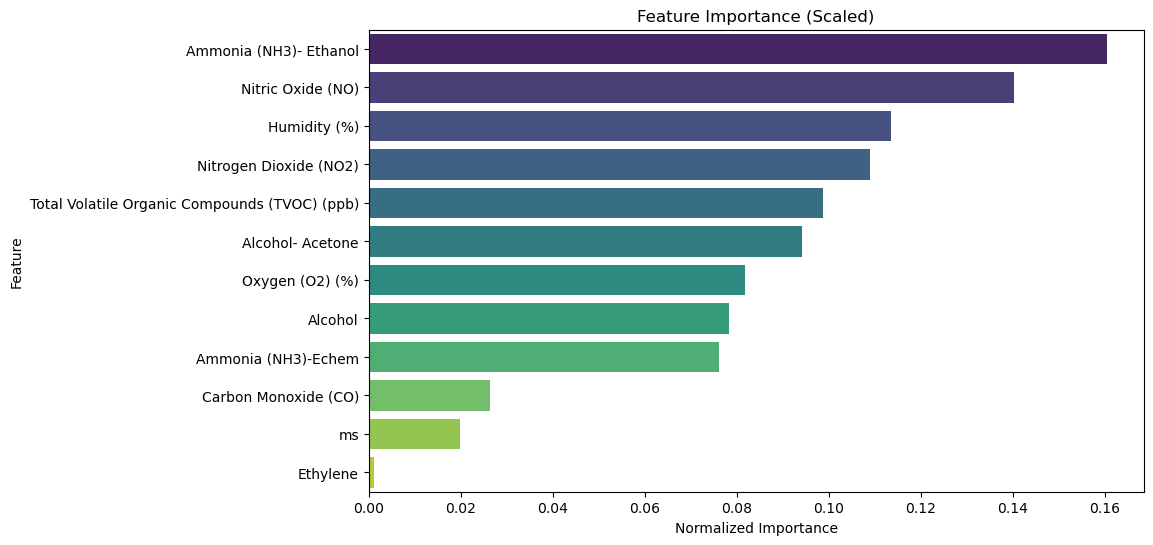

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize feature importances
normalized_importances = feature_importance_df_1['Importance'] / feature_importance_df_1['Importance'].sum()

# Create a new DataFrame with normalized importances
normalized_importance_df = pd.DataFrame({'Feature': feature_importance_df_1['Feature'], 'Normalized Importance': normalized_importances})

# Sort the DataFrame by normalized importance values in descending order
normalized_importance_df = normalized_importance_df.sort_values(by='Normalized Importance', ascending=False)

# Plot the scaled importance graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized Importance', y='Feature', data=normalized_importance_df, palette='viridis')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Scaled)')
plt.show()


In [20]:
def predict_gases(model_output):
    # Extract gas names and concentrations from the predicted output
    gas_concentrations = {}
    total_concentration = 0
    
    for output in model_output:
        # Split each output by '&' to separate gas names and concentrations
        gas_list = output.split('&')
        for gas_item in gas_list:
            # Extract gas name and concentration
            gas_name = gas_item.strip()  # Get the gas name
            concentration = int(gas_name[1:])  # Extract concentration from gas name
            gas_name = gas_name[0]  # Extract gas name without concentration
            
            # Update gas_concentrations dictionary
            if gas_name in gas_concentrations:
                gas_concentrations[gas_name] += concentration
            else:
                gas_concentrations[gas_name] = concentration
            
            total_concentration += concentration
    
    # Print concentration for each gas
    for gas, concentration in gas_concentrations.items():
        print(f"Concentration of {gas}: {concentration} ppm")
    
    # Print proportion for each gas
    if len(gas_concentrations) > 1:
        for gas, concentration in gas_concentrations.items():
            proportion = concentration / total_concentration
            print(f"In the mixture, {gas} is {proportion:.2%}")
    else:
        print("Single gas detected in the mixture")


C:\Users\keval\AppData\Local\Temp\ipykernel_1928\4023718290.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(class_labels, rotation=45, ha='right')


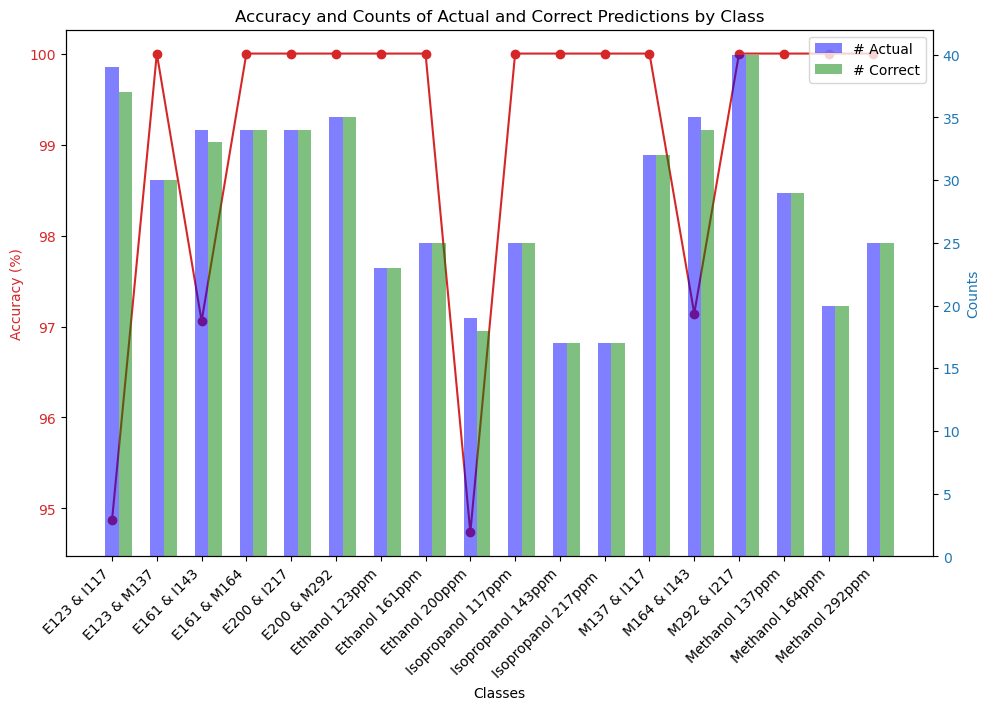

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
# Calculate accuracy for each class
class_labels = np.unique(y_test_1)
class_accuracy = []
for label in class_labels:
    class_mask = y_test_1 == label
    class_correct = np.sum(y_test_1[class_mask] == y_pred_1[class_mask])
    class_total = np.sum(class_mask)
    class_accuracy.append(class_correct / class_total * 100)

# Calculate counts of actual instances for each class
class_counts_actual = []
for label in class_labels:
    class_counts_actual.append(np.sum(y_test_1 == label))

# Calculate counts of correctly predicted instances for each class
class_counts_correct = []
for label in class_labels:
    class_mask = (y_test_1 == label) & (y_test_1 == y_pred_1)
    class_counts_correct.append(np.sum(class_mask))

# Plotting the combined graph for accuracy and counts
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Classes')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.plot(class_labels, class_accuracy, marker='o', color=color, label='% Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Counts', color=color)  
ax2.bar(np.arange(len(class_labels)), class_counts_actual, color='b', alpha=0.5, width=0.3, label='# Actual')
ax2.bar(np.arange(len(class_labels)) + 0.3, class_counts_correct, color='g', alpha=0.5, width=0.3, label='# Correct')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Accuracy and Counts of Actual and Correct Predictions by Class')

# Slant the x-axis labels
plt.xticks(rotation=45)
ax1.set_xticklabels(class_labels, rotation=45, ha='right')

plt.legend()
plt.show()


# Feature trial _2 (To get the best model)

In [21]:
# Specify the columns to filter
columns_to_keep_1 = ['Nitric Oxide (NO)','Total Volatile Organic Compounds (TVOC) (ppb)','Ammonia (NH3)-Echem', 'Nitrogen Dioxide (NO2)', 'Alcohol- Acetone', 'Alcohol', 'Ammonia (NH3)- Ethanol','Humidity (%)','Oxygen (O2) (%)','Gas_Type']

# Filter the DataFrame to keep only the specified columns
filtered_df_4 = combined_df_2.filter(columns_to_keep_1)

# Now you have a DataFrame 'filtered_df' containing only the specified columns
print(filtered_df_4.head())


   Nitric Oxide (NO)  Total Volatile Organic Compounds (TVOC) (ppb)  \
0              49092                                              0   
1              49138                                              0   
2              49131                                              0   
3              49134                                              0   
4              49076                                              0   

   Ammonia (NH3)-Echem  Nitrogen Dioxide (NO2)  Alcohol- Acetone  Alcohol  \
0                 8374                    8292             11802    21402   
1                 8356                    8296             11911    22432   
2                 8352                    8303             11936    22725   
3                 8351                    8260             11871    22676   
4                 8349                    8270             12021    22710   

   Ammonia (NH3)- Ethanol  Humidity (%)  Oxygen (O2) (%)        Gas_Type  
0                   40662          

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter


# Separate features (X) and target variable (y)
X_2 = filtered_df_4.drop(columns=['Gas_Type'])
y_2 = filtered_df_4['Gas_Type']

# Display class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_2))


# Split the dataset into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Get the count of each class in the target variable
class_counts = y_train_2.value_counts()

# Calculate the target number of samples for each class (3 times the majority class)
target_samples = {cls: class_counts.max() * 3 for cls, count in class_counts.items()}

# Apply SMOTE to the training set with specified sampling strategy
smote = SMOTE(sampling_strategy=target_samples, random_state=42)
X_resampled_2, y_resampled_2 = smote.fit_resample(X_train_2, y_train_2)

# Combine resampled features and target variable into a new DataFrame
resampled_df_2 = pd.concat([pd.DataFrame(X_resampled_2, columns=X_2.columns), pd.DataFrame(y_resampled_2, columns=['Gas_Type'])], axis=1)

# Display class distribution after applying SMOTE
print("Class distribution after SMOTE:", y_resampled_2.value_counts())


Class distribution before SMOTE: Counter({'E200 & M292': 171, 'E123 & M137': 171, 'E161 & M164': 171, 'E200 & I217': 171, 'E123 & I117': 171, 'E161 & I143': 171, 'M292 & I217': 171, 'M137 & I117': 171, 'M164 & I143': 171, 'Ethanol 200ppm': 114, 'Ethanol 123ppm': 114, 'Ethanol 161ppm': 114, 'Methanol 292ppm': 114, 'Methanol 137ppm': 114, 'Methanol 164ppm': 114, 'Isopropanol 217ppm ': 114, 'Isopropanol 117ppm': 114, 'Isopropanol 143ppm': 114})
Class distribution after SMOTE: E200 & M292            423
E123 & M137            423
Methanol 137ppm        423
Isopropanol 117ppm     423
Ethanol 123ppm         423
M292 & I217            423
Isopropanol 143ppm     423
E161 & M164            423
E200 & I217            423
Methanol 292ppm        423
Methanol 164ppm        423
Ethanol 161ppm         423
Isopropanol 217ppm     423
M164 & I143            423
M137 & I117            423
E123 & I117            423
E161 & I143            423
Ethanol 200ppm         423
Name: Gas_Type, dtype: int64


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_resampled_2, y_resampled_2)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize GBM with the best hyperparameters
best_gbm_2 = GradientBoostingClassifier(n_estimators=50, 
                                      min_samples_split=450, 
                                      min_samples_leaf=7, 
                                      max_depth=5, 
                                      min_impurity_decrease=0.0, 
                                      max_leaf_nodes=30, 
                                      learning_rate=best_params['learning_rate'],
                                      subsample=best_params['subsample'],
                                      max_features=best_params['max_features'],
                                      random_state=42)

# Train the model on the entire resampled training set
best_gbm_2.fit(X_resampled_2, y_resampled_2)

# Make predictions on the test set
y_pred_2 = best_gbm_2.predict(X_test_2)

# Calculate accuracy on the test set
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print("Accuracy:", accuracy_2)


Best Hyperparameters: {'learning_rate': 0.2, 'max_features': 'sqrt', 'subsample': 1.0}
Accuracy: 0.9922027290448343


In [109]:
class_names = np.unique(y_test_2)
for i, class_name in enumerate(class_names):
    print(f"Label {i} represents {class_name}")


Label 0 represents E123 & I117
Label 1 represents E123 & M137
Label 2 represents E161 & I143
Label 3 represents E161 & M164
Label 4 represents E200 & I217
Label 5 represents E200 & M292
Label 6 represents Ethanol 123ppm
Label 7 represents Ethanol 161ppm
Label 8 represents Ethanol 200ppm
Label 9 represents Isopropanol 117ppm
Label 10 represents Isopropanol 143ppm
Label 11 represents Isopropanol 217ppm 
Label 12 represents M137 & I117
Label 13 represents M164 & I143
Label 14 represents M292 & I217
Label 15 represents Methanol 137ppm
Label 16 represents Methanol 164ppm
Label 17 represents Methanol 292ppm


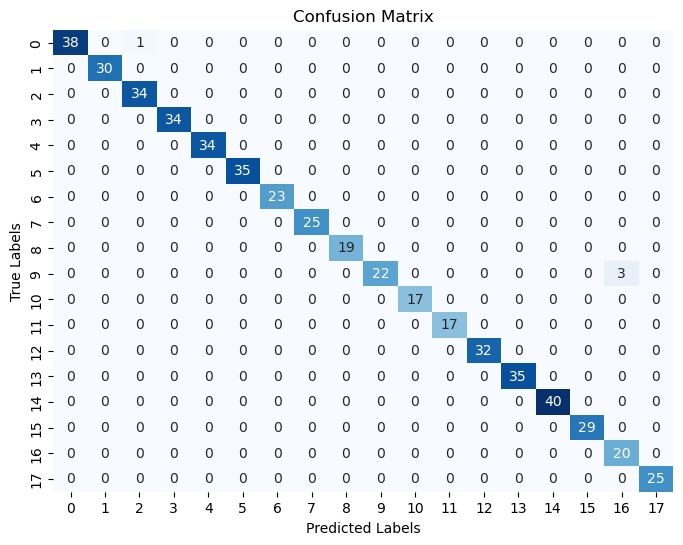

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test_2, y_pred_2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [24]:
# Assuming 'best_gbm' is your trained GBM model

# Access feature importances
feature_importances_2 = best_gbm_2.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df_2 = pd.DataFrame({'Feature': X_2.columns, 'Importance': feature_importances_2})

# Sort the DataFrame by importance values in descending order
feature_importance_df_2 = feature_importance_df_2.sort_values(by='Importance', ascending=False)

# Print or visualize the sorted feature importances
print(feature_importance_df_2)


                                         Feature  Importance
0                              Nitric Oxide (NO)    0.182970
6                         Ammonia (NH3)- Ethanol    0.123972
7                                   Humidity (%)    0.118801
4                               Alcohol- Acetone    0.104794
2                            Ammonia (NH3)-Echem    0.101395
8                                Oxygen (O2) (%)    0.096229
5                                        Alcohol    0.096015
1  Total Volatile Organic Compounds (TVOC) (ppb)    0.093721
3                         Nitrogen Dioxide (NO2)    0.082102


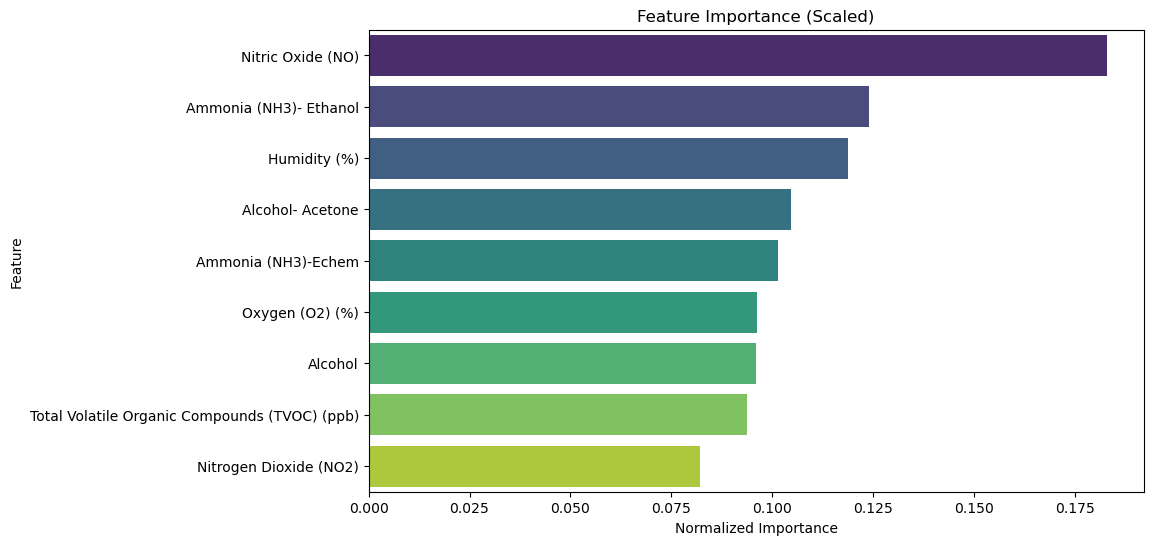

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize feature importances
normalized_importances = feature_importance_df_2['Importance'] / feature_importance_df_2['Importance'].sum()

# Create a new DataFrame with normalized importances
normalized_importance_df = pd.DataFrame({'Feature': feature_importance_df_2['Feature'], 'Normalized Importance': normalized_importances})

# Sort the DataFrame by normalized importance values in descending order
normalized_importance_df = normalized_importance_df.sort_values(by='Normalized Importance', ascending=False)

# Plot the scaled importance graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized Importance', y='Feature', data=normalized_importance_df, palette='viridis')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Scaled)')
plt.show()


In [28]:
# Import the necessary libraries
#Row 164
import pandas as pd

# Assuming the provided values are stored in a DataFrame called 'new_data'
new_data = pd.DataFrame({
    'Nitric Oxide (NO)': [48992],
    'Total Volatile Organic Compounds (TVOC) (ppb)': [6658],
    'Ammonia (NH3)-Echem': [8226],
    'Nitrogen Dioxide (NO2)': [7603],
    'Alcohol- Acetone': [10248],
    'Alcohol': [25869],
    'Ammonia (NH3)- Ethanol': [59581],
    'Humidity (%)': [46],
    'Oxygen (O2) (%)': [20.03]
})
# Use the 'best_gbm' model to predict TVOC
predicted_gas = best_gbm_2.predict(new_data)

# Print the predicted TVOC
print("Predicted Gas:", predicted_gas)
# Example usage:
predict_gases(predicted_gas)

Predicted Gas: ['E161 & I143']
Concentration of E: 161 ppm
Concentration of I: 143 ppm
In the mixture, E is 52.96%
In the mixture, I is 47.04%


C:\Users\keval\AppData\Local\Temp\ipykernel_1928\292712723.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(class_labels, rotation=45, ha='right')


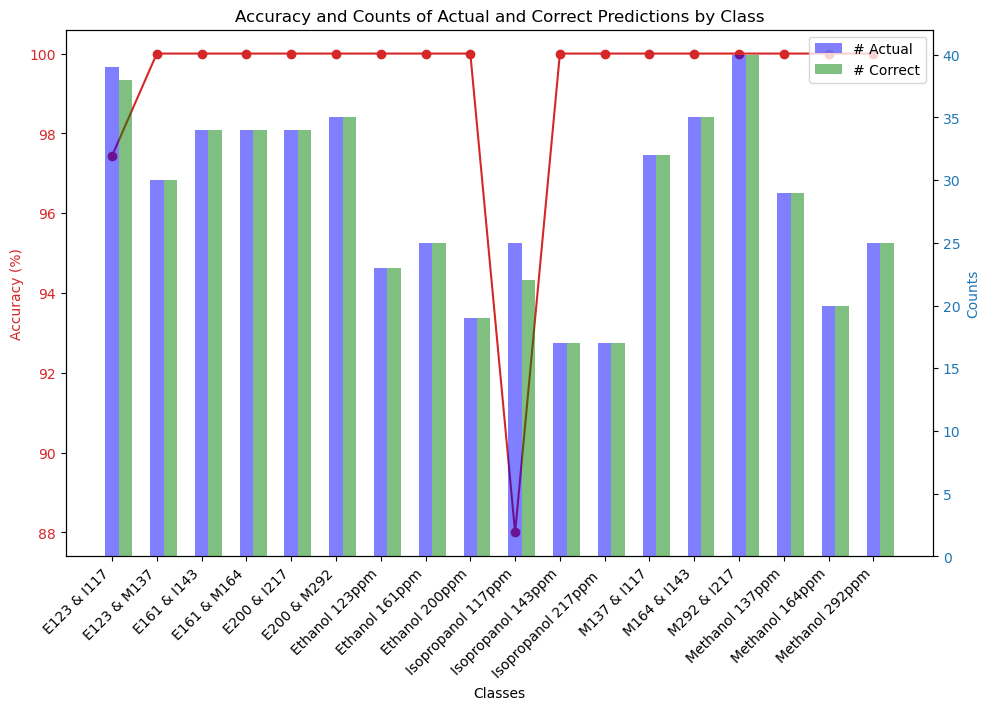

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
# Calculate accuracy for each class
class_labels = np.unique(y_test_2)
class_accuracy = []
for label in class_labels:
    class_mask = y_test_2 == label
    class_correct = np.sum(y_test_2[class_mask] == y_pred_2[class_mask])
    class_total = np.sum(class_mask)
    class_accuracy.append(class_correct / class_total * 100)

# Calculate counts of actual instances for each class
class_counts_actual = []
for label in class_labels:
    class_counts_actual.append(np.sum(y_test_2 == label))

# Calculate counts of correctly predicted instances for each class
class_counts_correct = []
for label in class_labels:
    class_mask = (y_test_2 == label) & (y_test_2 == y_pred_2)
    class_counts_correct.append(np.sum(class_mask))

# Plotting the combined graph for accuracy and counts
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Classes')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.plot(class_labels, class_accuracy, marker='o', color=color, label='% Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Counts', color=color)  
ax2.bar(np.arange(len(class_labels)), class_counts_actual, color='b', alpha=0.5, width=0.3, label='# Actual')
ax2.bar(np.arange(len(class_labels)) + 0.3, class_counts_correct, color='g', alpha=0.5, width=0.3, label='# Correct')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Accuracy and Counts of Actual and Correct Predictions by Class')

# Slant the x-axis labels
plt.xticks(rotation=45)
ax1.set_xticklabels(class_labels, rotation=45, ha='right')

plt.legend()
plt.show()


# If only 7 sensors are used for gas classification

In [29]:
# Specify the columns to filter
columns_to_keep_5 = ['Ammonia (NH3)-Echem', 'Nitrogen Dioxide (NO2)', 'Ethylene', 'Carbon Monoxide (CO)', 'Alcohol- Acetone', 'Alcohol', 'Ammonia (NH3)- Ethanol','Gas_Type']

# Filter the DataFrame to keep only the specified columns
filtered_df_5 = combined_df_2.filter(columns_to_keep_5)

# Now you have a DataFrame 'filtered_df' containing only the specified columns
print(filtered_df_5.head())


   Ammonia (NH3)-Echem  Nitrogen Dioxide (NO2)  Ethylene  \
0                 8374                    8292      8306   
1                 8356                    8296      8308   
2                 8352                    8303      8318   
3                 8351                    8260      8287   
4                 8349                    8270      8298   

   Carbon Monoxide (CO)  Alcohol- Acetone  Alcohol  Ammonia (NH3)- Ethanol  \
0                  8277             11802    21402                   40662   
1                  8342             11911    22432                   40989   
2                  8279             11936    22725                   40314   
3                  8304             11871    22676                   39124   
4                  8287             12021    22710                   38280   

         Gas_Type  
0  Ethanol 200ppm  
1  Ethanol 200ppm  
2  Ethanol 200ppm  
3  Ethanol 200ppm  
4  Ethanol 200ppm  


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter


# Separate features (X) and target variable (y)
X_3 = filtered_df_5.drop(columns=['Gas_Type'])
y_3 = filtered_df_5['Gas_Type']

# Display class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_3))


# Split the dataset into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Get the count of each class in the target variable
class_counts = y_train_3.value_counts()

# Calculate the target number of samples for each class (3 times the majority class)
target_samples = {cls: class_counts.max() * 3 for cls, count in class_counts.items()}

# Apply SMOTE to the training set with specified sampling strategy
smote = SMOTE(sampling_strategy=target_samples, random_state=42)
X_resampled_3, y_resampled_3 = smote.fit_resample(X_train_3, y_train_3)

# Combine resampled features and target variable into a new DataFrame
resampled_df_3 = pd.concat([pd.DataFrame(X_resampled_3, columns=X_3.columns), pd.DataFrame(y_resampled_3, columns=['Gas_Type'])], axis=1)

# Display class distribution after applying SMOTE
print("Class distribution after SMOTE:", y_resampled_3.value_counts())


Class distribution before SMOTE: Counter({'E200 & M292': 171, 'E123 & M137': 171, 'E161 & M164': 171, 'E200 & I217': 171, 'E123 & I117': 171, 'E161 & I143': 171, 'M292 & I217': 171, 'M137 & I117': 171, 'M164 & I143': 171, 'Ethanol 200ppm': 114, 'Ethanol 123ppm': 114, 'Ethanol 161ppm': 114, 'Methanol 292ppm': 114, 'Methanol 137ppm': 114, 'Methanol 164ppm': 114, 'Isopropanol 217ppm ': 114, 'Isopropanol 117ppm': 114, 'Isopropanol 143ppm': 114})
Class distribution after SMOTE: E200 & M292            423
E123 & M137            423
Methanol 137ppm        423
Isopropanol 117ppm     423
Ethanol 123ppm         423
M292 & I217            423
Isopropanol 143ppm     423
E161 & M164            423
E200 & I217            423
Methanol 292ppm        423
Methanol 164ppm        423
Ethanol 161ppm         423
Isopropanol 217ppm     423
M164 & I143            423
M137 & I117            423
E123 & I117            423
E161 & I143            423
Ethanol 200ppm         423
Name: Gas_Type, dtype: int64


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_resampled_3, y_resampled_3)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize GBM with the best hyperparameters
best_gbm_3 = GradientBoostingClassifier(n_estimators=50, 
                                      min_samples_split=450, 
                                      min_samples_leaf=7, 
                                      max_depth=5, 
                                      min_impurity_decrease=0.0, 
                                      max_leaf_nodes=30, 
                                      learning_rate=best_params['learning_rate'],
                                      subsample=best_params['subsample'],
                                      max_features=best_params['max_features'],
                                      random_state=42)

# Train the model on the entire resampled training set
best_gbm_3.fit(X_resampled_3, y_resampled_3)

# Make predictions on the test set
y_pred_3 = best_gbm_3.predict(X_test_3)

# Calculate accuracy on the test set
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print("Accuracy:", accuracy_3)


Best Hyperparameters: {'learning_rate': 0.2, 'max_features': 'sqrt', 'subsample': 1.0}
Accuracy: 0.9181286549707602


In [32]:
# Assuming 'best_gbm' is your trained GBM model

# Access feature importances
feature_importances_3 = best_gbm_3.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df_3 = pd.DataFrame({'Feature': X_3.columns, 'Importance': feature_importances_3})

# Sort the DataFrame by importance values in descending order
feature_importance_df_3 = feature_importance_df_3.sort_values(by='Importance', ascending=False)

# Print or visualize the sorted feature importances
print(feature_importance_df_3)


                  Feature  Importance
4        Alcohol- Acetone    0.275070
6  Ammonia (NH3)- Ethanol    0.224430
5                 Alcohol    0.171599
1  Nitrogen Dioxide (NO2)    0.165186
0     Ammonia (NH3)-Echem    0.128206
3    Carbon Monoxide (CO)    0.029807
2                Ethylene    0.005702


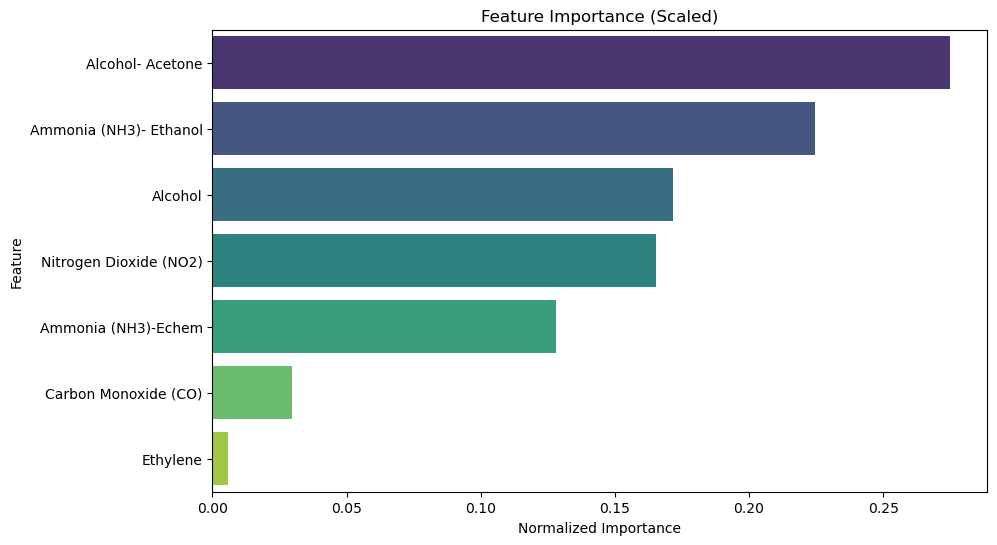

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize feature importances
normalized_importances = feature_importance_df_3['Importance'] / feature_importance_df_3['Importance'].sum()

# Create a new DataFrame with normalized importances
normalized_importance_df = pd.DataFrame({'Feature': feature_importance_df_3['Feature'], 'Normalized Importance': normalized_importances})

# Sort the DataFrame by normalized importance values in descending order
normalized_importance_df = normalized_importance_df.sort_values(by='Normalized Importance', ascending=False)

# Plot the scaled importance graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized Importance', y='Feature', data=normalized_importance_df, palette='viridis')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Scaled)')
plt.show()


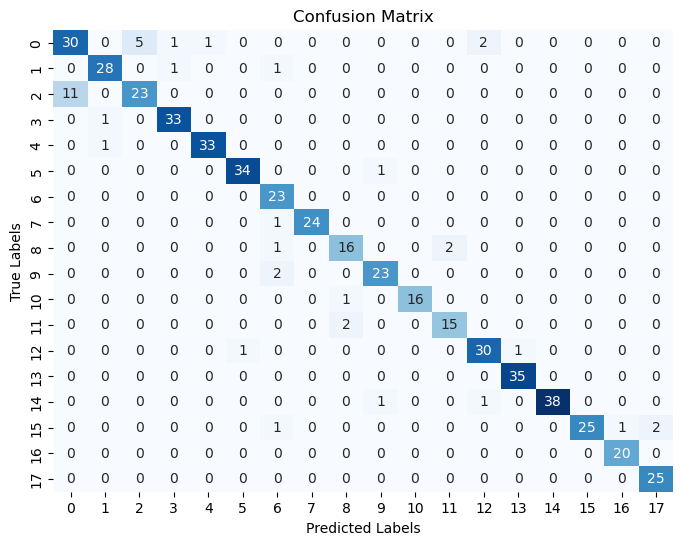

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test_3, y_pred_3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
